In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('/content/aki datset.csv')
dataset.head(5)

,patient no,AKi_R,AKI,DEATH,Time(days in ICU),age,sex,INTUBATION,INOTROPES,HTN,...,DURATIONSYMPTOMS,FEVERgt38C,COUGH,SOB,MYALGIA,SORETHROAT,AGEUSIA,GISYMPTOMS,Urea,creatinine
0,1,0,0,0,1,79,0,1,0,1,...,8,0,1,1,0,0,0,0,44.6,1.13
1,1,0,0,0,2,79,0,1,0,1,...,8,0,1,1,0,0,0,0,50.6,0.92
2,1,0,0,0,3,79,0,1,0,1,...,8,0,1,1,0,0,0,0,87.1,0.99
3,1,0,0,0,4,79,0,1,0,1,...,8,0,1,1,0,0,0,0,97.6,0.88
4,1,0,0,0,5,79,0,1,0,1,...,8,0,1,1,0,0,0,0,107.2,0.77


In [4]:
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)
dataset


,patient no,AKi_R,AKI,DEATH,Time(days in ICU),age,sex,INTUBATION,INOTROPES,HTN,...,DURATIONSYMPTOMS,FEVERgt38C,COUGH,SOB,MYALGIA,SORETHROAT,AGEUSIA,GISYMPTOMS,Urea,creatinine
0,1,0,0,0,1,79,0,1,0,1,...,8,0,1,1,0,0,0,0,44.6,1.13
1,1,0,0,0,2,79,0,1,0,1,...,8,0,1,1,0,0,0,0,50.6,0.92
2,1,0,0,0,3,79,0,1,0,1,...,8,0,1,1,0,0,0,0,87.1,0.99
3,1,0,0,0,4,79,0,1,0,1,...,8,0,1,1,0,0,0,0,97.6,0.88
4,1,0,0,0,5,79,0,1,0,1,...,8,0,1,1,0,0,0,0,107.2,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,398,0,0,0,10,62,0,0,0,1,...,4,1,1,1,0,0,0,0,29.3,0.48
3871,398,0,0,0,11,62,0,0,0,1,...,4,1,1,1,0,0,0,0,30.7,0.42
3872,399,0,0,0,1,50,1,0,0,0,...,10,1,0,1,0,0,0,0,35.5,0.56
3873,399,0,0,0,2,50,1,0,0,0,...,10,1,0,1,0,0,0,0,44.7,0.62


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
patient no,3875.0,208.850839,116.329171,1.00,93.0,237.00,297.50,399.00
AKi_R,3875.0,0.537806,0.800943,0.00,0.0,0.00,1.00,2.00
AKI,3875.0,0.132645,0.339235,0.00,0.0,0.00,0.00,1.00
DEATH,3875.0,0.037161,0.189181,0.00,0.0,0.00,0.00,1.00
Time(days in ICU),3875.0,6.903742,5.204618,1.00,3.0,6.00,10.00,34.00
age,3875.0,55.001032,13.390428,0.00,45.0,56.00,64.00,87.00
sex,3875.0,0.617548,0.486049,0.00,0.0,1.00,1.00,1.00
INTUBATION,3875.0,0.350968,0.477334,0.00,0.0,0.00,1.00,1.00
INOTROPES,3875.0,0.122323,0.327700,0.00,0.0,0.00,0.00,1.00
HTN,3875.0,0.491613,0.499994,0.00,0.0,0.00,1.00,1.00


In [6]:
print("Data shape:",dataset.shape)

Data shape: (3875, 29)


In [7]:
dataset.isnull().sum()
print(dataset.isnull().sum())

patient no           0
AKi_R                0
AKI                  0
DEATH                0
Time(days in ICU)    0
age                  0
sex                  0
INTUBATION           0
INOTROPES            0
HTN                  0
DM                   0
DKA                  0
CAD                  0
COPD                 0
Asthma               0
TB                   0
CVA                  0
Obesity              0
hypothyroid          0
DURATIONSYMPTOMS     0
FEVERgt38C           0
COUGH                0
SOB                  0
MYALGIA              0
SORETHROAT           0
AGEUSIA              0
GISYMPTOMS           0
Urea                 0
creatinine           0
dtype: int64


In [8]:
X = dataset.iloc[:, 0:28].values
x = dataset.iloc[:, 0:28]
y = dataset.iloc[:, 28].values
y_name = dataset.iloc[:, 28:29]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (3875, 28)
y shape: (3875, 1)


In [9]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

patient no
AKi_R
AKI
DEATH
Time(days in ICU)
age
sex
INTUBATION
INOTROPES
HTN
DM
DKA
CAD
COPD
Asthma
TB
CVA
Obesity
hypothyroid
DURATIONSYMPTOMS
FEVERgt38C
COUGH
SOB
MYALGIA
SORETHROAT
AGEUSIA
GISYMPTOMS
Urea


Class:
creatinine


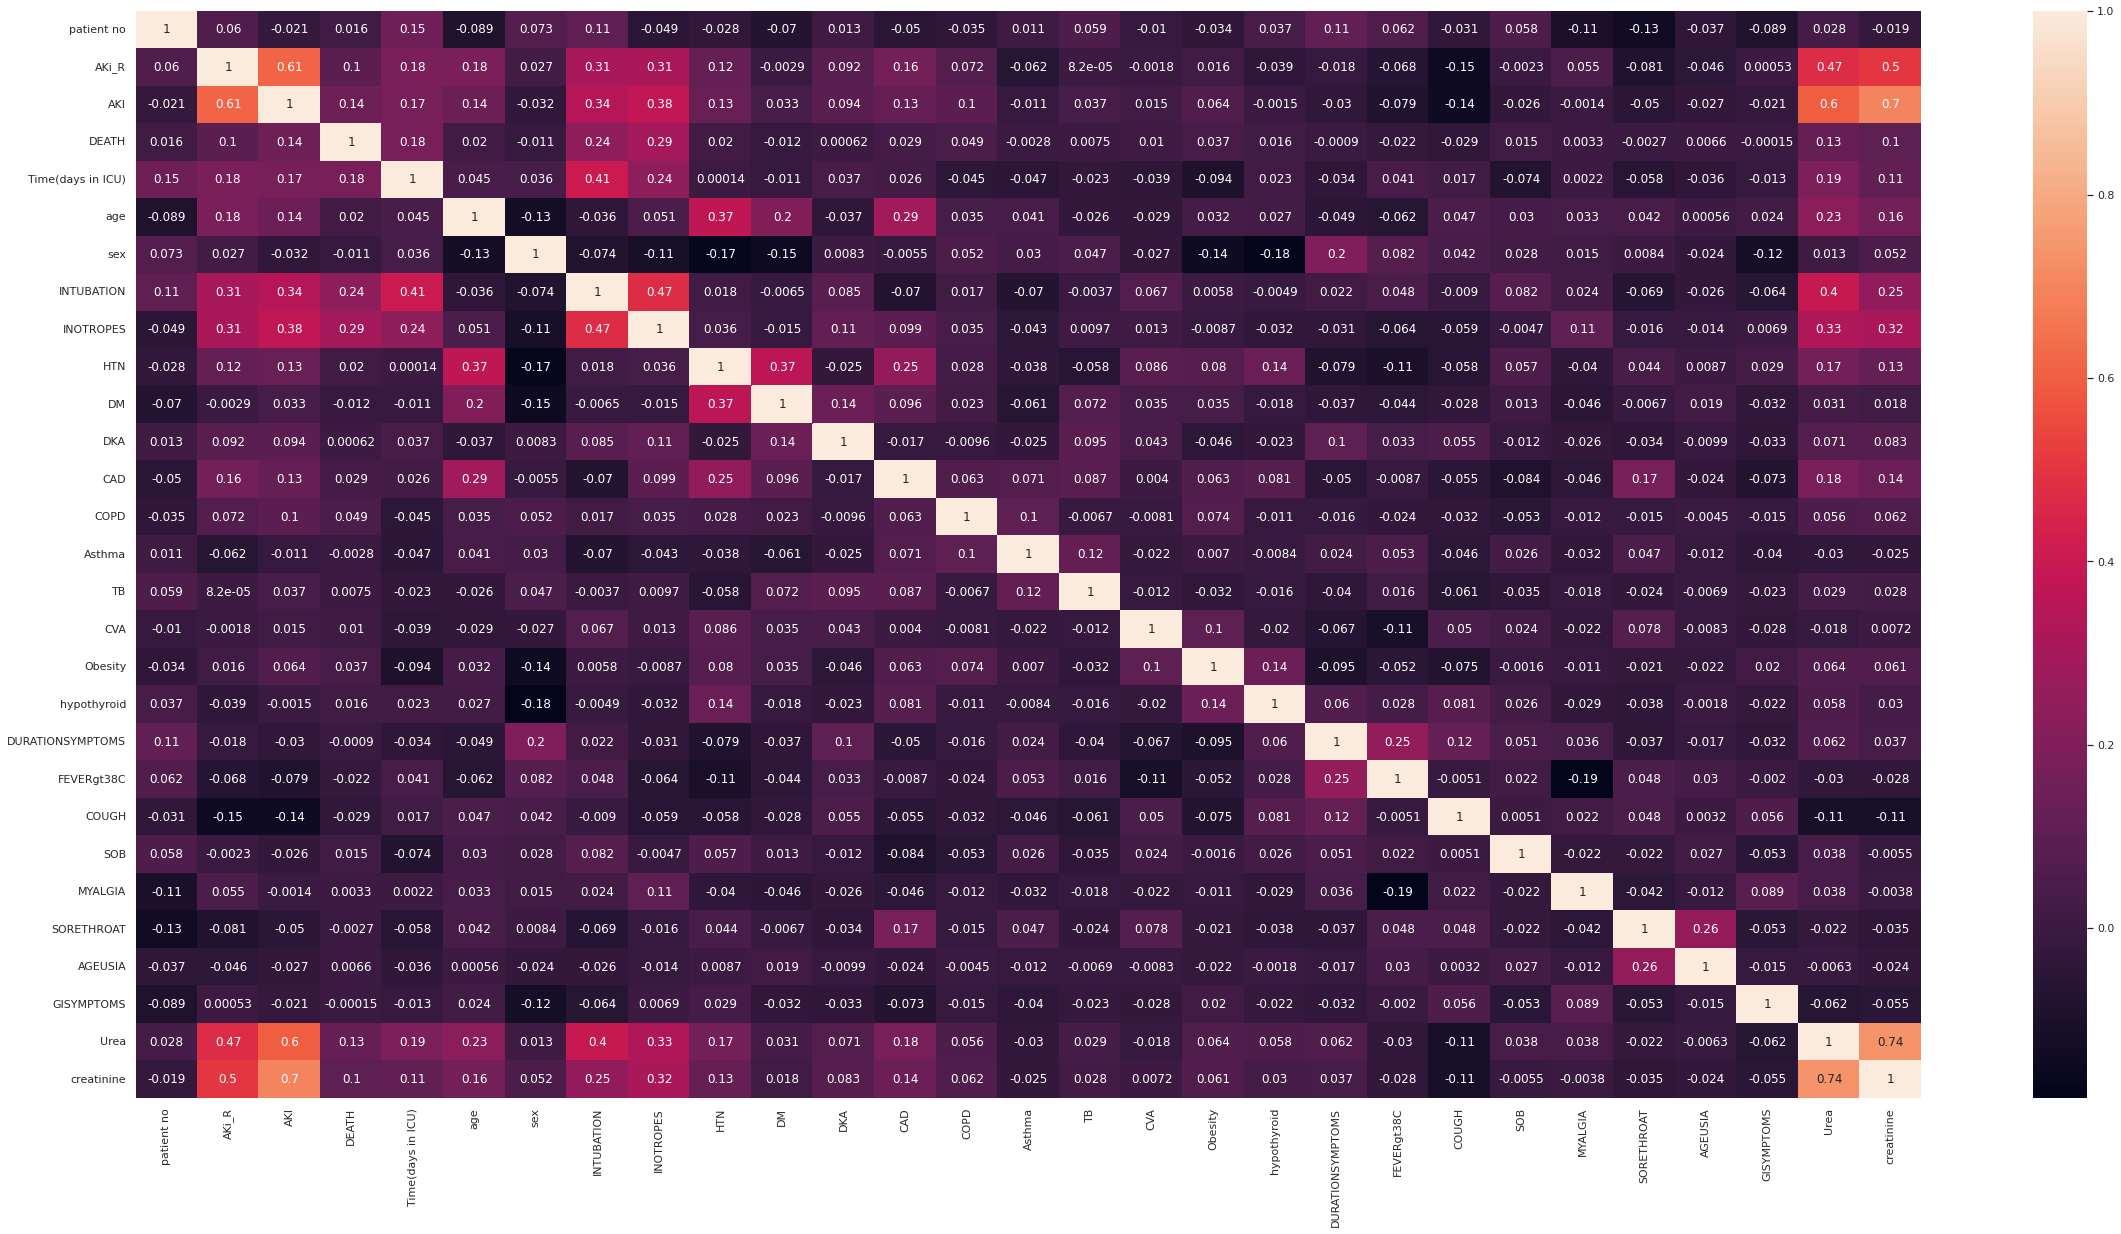

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

Splitting the dataset


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

FEATURE SCALLING

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

DECISION TREE REGRESSOR

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
regressor = DecisionTreeRegressor(random_state=0)

In [49]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
y_pred_regressor = regressor.predict(X_test)

[]

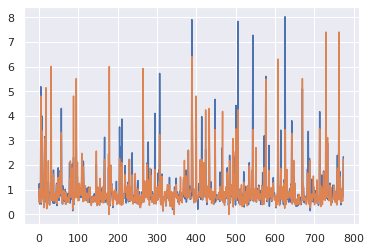

In [57]:
plt.plot(y_test)
plt.plot(y_pred_regressor)
plt.plot(figsize=(40, 20))

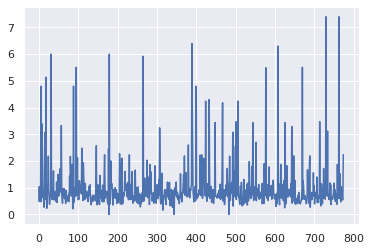

In [52]:
plt.plot(y_pred_regressor)

In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_regressor)

0.32027974193548386

KNN

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
              "weights": ["uniform", "distance"],
              "metric":["minkowski","euclidean", "manhattan"],
              'p':[1,2]
              }

In [ ]:
print(param_grid)

In [ ]:
classifier_knn    = KNeighborsClassifier()
classifier_knn_cv = GridSearchCV(classifier_knn,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_knn_cv)

In [ ]:
classifier_knn_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_knn_cv.best_params_)
print("\n")
print("accuracy :",classifier_knn_cv.best_score_)

In [15]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [16]:
classifier_knn.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [ ]:
print(y_pred_knn)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

In [ ]:
sn.heatmap(cm_knn, annot= True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn)
re  = recall_score(y_test, y_pred_knn)
f1  = f1_score(y_test, y_pred_knn)

In [ ]:
print("Summary of KNN")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_knn = classifier_knn.predict_proba(X_test)
print(prob_all_knn)

In [ ]:
# keep probabilities for the positive outcome only
probs_knn = prob_all_knn[:, 1]

In [ ]:
# calculate scores
auc_knn = roc_auc_score(y_test, probs_knn)
print('K-NN: ROC AUC=%.3f' % (auc_knn))

In [ ]:
# Plot the ROC 

# calculate roc curves
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)

In [ ]:
print(fpr_knn)

In [ ]:
print(tpr_knn)

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_knn, tpr_knn,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              'degree': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              "probability" : [True]
              }

In [ ]:
print(param_grid)

In [ ]:
classifier_svm    = SVC()
classifier_svm_cv = GridSearchCV(classifier_svm,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_svm_cv)

In [ ]:
classifier_svm_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_svm_cv.best_params_)
print("\n")
print("accuracy :",classifier_svm_cv.best_score_)

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf',probability=True, random_state = 0)

In [ ]:
# Training the SVM
classifier_svm.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_svm)
pre = precision_score(y_test, y_pred_svm)
re  = recall_score(y_test, y_pred_svm)
f1  = f1_score(y_test, y_pred_svm)

In [ ]:
print("Summary of SVM")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

ROC of SVM

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_svm = classifier_svm.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_svm = prob_all_svm[:, 1]

In [ ]:
# calculate scores
auc_svm = roc_auc_score(y_test, probs_svm)
print('SVM: ROC AUC=%.3f' % (auc_svm))

In [ ]:
# Plot the ROC 

# calculate roc curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_svm)

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_svm, tpr_svm,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

DECISION TREE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
              "criterion" : ["gini", "entropy"],
              "splitter" : ["best", "random"],
              'max_depth' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
              "max_features" : ["auto", "sqrt", "log2"]
              }

In [ ]:
print(param_grid)

In [ ]:
classifier_dt = DecisionTreeClassifier()
classifier_dt_cv = GridSearchCV(classifier_dt,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_dt_cv)

In [ ]:
classifier_dt_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_dt_cv.best_params_)
print("\n")
print("accuracy :",classifier_dt_cv.best_score_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
# Training the Decision Tree
classifier_dt.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_dt)
pre = precision_score(y_test, y_pred_dt)
re  = recall_score(y_test, y_pred_dt)
f1  = f1_score(y_test, y_pred_dt)

In [ ]:
print("Summary of Decision Tree")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

ROC of DECISION TREE

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_dt = classifier_dt.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_dt = prob_all_dt[:, 1]

In [ ]:
# calculate scores
auc_dt = roc_auc_score(y_test, probs_dt)
print('Decision Tree: ROC AUC=%.3f' % (auc_dt))

In [ ]:
# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_dt, tpr_dt,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
              'random_state' : [0,1,2,3,4,5],
              'C' : [0,1,2,3,4,5,6,7,8,9,10],
              "penalty" : ["l1", "l2", "elasticnet", "none"],
              "dual" : [True],
              "fit_intercept" : [True],
              "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class" : ["auto", "ovr", "multinomial"]
              }

In [ ]:
print(param_grid)

In [ ]:
classifier_log = LogisticRegression()
classifier_log_cv = GridSearchCV(classifier_log,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_log_cv)

In [ ]:
classifier_log_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_log_cv.best_params_)
print("\n")
print("accuracy :",classifier_log_cv.best_score_)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression(dual=False,penalty="l2",random_state=0)

In [ ]:
#Training the decision tree
classifier_lr.fit(X_train, y_train)

In [ ]:
#Predicting the test set results
y_pred_lr=classifier_lr.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_lr)
pre = precision_score(y_test, y_pred_lr)
re  = recall_score(y_test, y_pred_lr)
f1  = f1_score(y_test, y_pred_lr)

In [ ]:
print("Summary of Logistic regression")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

ROC of LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_lr = classifier_lr.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_lr = prob_all_lr[:, 1]

In [ ]:
# calculate scores
auc_lr = roc_auc_score(y_test, probs_lr)
print('Logistic Regression: ROC AUC=%.3f' % (auc_lr))

In [ ]:
# calculate roc curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_lr, tpr_lr,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Naive Bayes

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
param_grid = {
              'var_smoothing' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
              }

In [ ]:
print(param_grid)

In [ ]:
gnb = GaussianNB()
gnb_cv = GridSearchCV(gnb,param_grid,cv=10,verbose=2,n_jobs=-1)
print(gnb_cv)

In [ ]:
gnb_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gnb_cv.best_params_)
print("\n")
print("accuracy :",gnb_cv.best_score_)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB = GaussianNB(priors=None)

In [ ]:
#Training the decision tree
classifier_GaussianNB.fit(X_train, y_train)

In [ ]:
#Predicting the test set results
y_pred_GaussianNB=classifier_GaussianNB.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB)
print(cm_GaussianNB)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_GaussianNB)
pre = precision_score(y_test, y_pred_GaussianNB)
re  = recall_score(y_test, y_pred_GaussianNB)
f1  = f1_score(y_test, y_pred_GaussianNB)

In [ ]:
print("Summary of GaussianNB ")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

ROC of NAIVE BAYES

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_GaussianNB = classifier_GaussianNB.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_GaussianNB = prob_all_GaussianNB[:, 1]

In [ ]:
# calculate scores
auc_GaussianNB = roc_auc_score(y_test, probs_GaussianNB)
print('Decision Tree: ROC AUC=%.3f' % (auc_GaussianNB))

In [ ]:
# calculate roc curves
fpr_GaussianNB, tpr_GaussianNB, _ = roc_curve(y_test, probs_GaussianNB)

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_GaussianNB, tpr_GaussianNB,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_GaussianNB)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Naive Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
              'max_depth' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'random_state' : [0,1,2,3,4,5],
              }

In [ ]:
print(param_grid)

In [ ]:
classifier_rf = RandomForestClassifier()
classifier_rf_cv = GridSearchCV(classifier_rf,param_grid,cv=10,verbose=2,n_jobs=-1)
print(classifier_rf_cv)

In [ ]:
classifier_rf_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",classifier_rf_cv.best_params_)
print("\n")
print("accuracy :",classifier_rf_cv.best_score_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion="gini",min_samples_leaf=1,random_state=0)

In [ ]:
#Training the decision tree
classifier_rf.fit(X_train, y_train)

In [ ]:
#Predicting the test set results
y_pred_rf=classifier_rf.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_rf)
pre = precision_score(y_test, y_pred_rf)
re  = recall_score(y_test, y_pred_rf)
f1  = f1_score(y_test, y_pred_rf)

In [ ]:
print("Summary of Random Forest ")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

ROC of RANDOM FOREST

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_rf = classifier_rf.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_rf = prob_all_rf[:, 1]

In [ ]:
# calculate scores
auc_rf = roc_auc_score(y_test, probs_rf)
print('Decision Tree: ROC AUC=%.3f' % (auc_rf))

In [ ]:
# calculate roc curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_rf, tpr_rf,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
param_grid = {
              'hidden_layer_sizes' : [(10, 10, 10)], 
              "activation" : ["identity", "logistic", "tanh", "relu"],
              "solver" : ["lbfgs", "sgd", "adam"],
              'alpha' : [0.0001, 0.05],
              "learning_rate" : ["constant", "invscaling", "adaptive"]
              }

In [ ]:
print(param_grid)

In [ ]:
mlp = MLPClassifier()
mlp_cv = GridSearchCV(mlp,param_grid,cv=10,verbose=2,n_jobs=-1)
print(mlp_cv)

In [ ]:
mlp_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",mlp_cv.best_params_)
print("\n")
print("accuracy :",mlp_cv.best_score_)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation = 'relu', alpha = 0.05, hidden_layer_sizes = (10, 10, 10), learning_rate = 'invscaling', solver = 'lbfgs') 
# idden_layer_sizes=(10, 10, 10), max_iter=1000

In [ ]:
mlp.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred_mlp = mlp.predict(X_test)

In [ ]:
print(y_pred_mlp)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(cm_mlp)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
ac  = accuracy_score(y_test, y_pred_mlp)
pre = precision_score(y_test, y_pred_mlp)
re  = recall_score(y_test, y_pred_mlp)
f1  = f1_score(y_test, y_pred_mlp)

In [ ]:
print("Summary of MLP")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

ROC of MLP

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_mlp = classifier_mlp.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_mlp = prob_all_mlp[:, 1]

In [ ]:
# calculate scores
auc_mlp = roc_auc_score(y_test, probs_mlp)
print('MLP: ROC AUC=%.3f' % (auc_mlp))

In [ ]:
# Plot the ROC 

# calculate roc curves
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, probs_mlp)

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_mlp, tpr_mlp,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of MLP")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_knn, tpr_knn,linewidth=1, label = 'KNN = %0.4f' % auc_knn)
plt.plot(fpr_svm, tpr_svm,linewidth=1, label = 'SVM = %0.4f' % auc_svm)
plt.plot(fpr_dt, tpr_dt,linewidth=1,   label =  ' DT = %0.4f' % auc_dt)
plt.plot(fpr_log, tpr_log,linewidth=1,   label =  ' LOG = %0.4f' % auc_log)
plt.plot(fpr_gnb, tpr_gnb,linewidth=1,   label =  ' GNB = %0.4f' % auc_gnb)
plt.plot(fpr_rf, tpr_rf,linewidth=1,   label =  ' RF = %0.4f' % auc_rf)
plt.plot(fpr_mlp, tpr_mlp,linewidth=1,   label =  ' MLP = %0.4f' % auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ANN

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
z = x.shape[1]
print(z)

In [ ]:
classifier.add(Dense(10, input_dim = z, activation = 'relu'))
classifier.add(Dense(5, input_dim = 10, activation = 'relu'))
classifier.add(Dense(2, input_dim = 5, activation = 'softmax'))

In [ ]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 5
epochs = 100

history = classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

scores = classifier.evaluate(X_test, y_test, verbose=1)

print("Test loss:", scores[0])
print("Test Accuracy:", scores[1])

In [ ]:
history_dict = history.history
train_acc = history_dict['accuracy']
train_loss = history_dict['loss']
val_acc = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Training Loss'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Validation Accuracy', 'Validation Loss'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
y_pred = classifier.predict(X_test)
pred = np.argmax(y_pred, axis = -1)
label_encoder = LabelEncoder().fit(y_test)
label_y = label_encoder.transform(y_test)
cm = confusion_matrix(label_y, pred)
print(cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_y,pred))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, pred)
pre = precision_score(y_test, pred, average = 'macro')
re  = recall_score(y_test, pred, average = 'macro')
f1  = f1_score(y_test, pred, average = 'macro')

In [ ]:
def summary(ac, pre, re, f1, algo):
  print("Summary of ", algo)
  print("Accuracy    =", ac)
  print("Precison    =",pre)
  print("Recall      =", re)
  print("f1 score    =", f1)

In [ ]:
summary(ac, pre, re, f1, "ANN")

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1)
plt.rcParams['figure.figsize']=20,10
sn.set_style('darkgrid')

plt.plot(train_acc, linewidth = 4, label = 'Training Accuracy')
plt.plot(train_loss, linewidth = 4, label = 'Training Loss')
plt.plot(val_acc, linewidth = 4, label = 'Validation Accuracy')
plt.plot(val_loss, linewidth = 4, label = 'Validation Loss')
plt.ylim(0, 1.05)

plt.xlabel('epoch', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.grid(True)
plt.legend()
plt.title("Model Performance", fontsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.legend(loc=5, prop={'size':20})
plt.show()